In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import cv2
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']

In [2]:
img = cv2.imread('love.jpg',2)

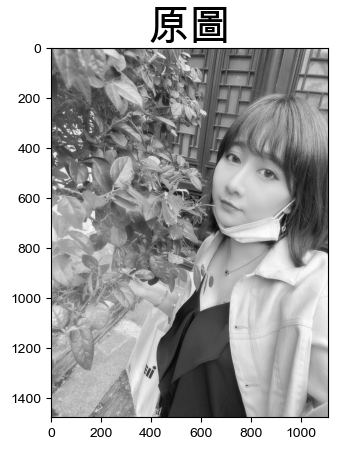

In [3]:
plt.title('原圖',fontsize = 30)
plt.imshow(img, cmap='gray')

In [4]:
npModel = np.array(img)
npModel

array([[105, 103, 113, ..., 222, 220, 218],
       [103, 103, 115, ..., 225, 223, 222],
       [117, 113, 124, ..., 226, 224, 224],
       ...,
       [120, 132, 132, ..., 168, 169, 169],
       [141, 156, 147, ..., 168, 168, 169],
       [168, 172, 153, ..., 168, 169, 169]], dtype=uint8)

In [5]:
h, w = npModel.shape
h, w

(1479, 1109)

In [6]:
u, s, vh=np.linalg.svd(npModel, full_matrices=False)
u.shape, s.shape, vh.shape

((1479, 1109), (1109,), (1109, 1109))

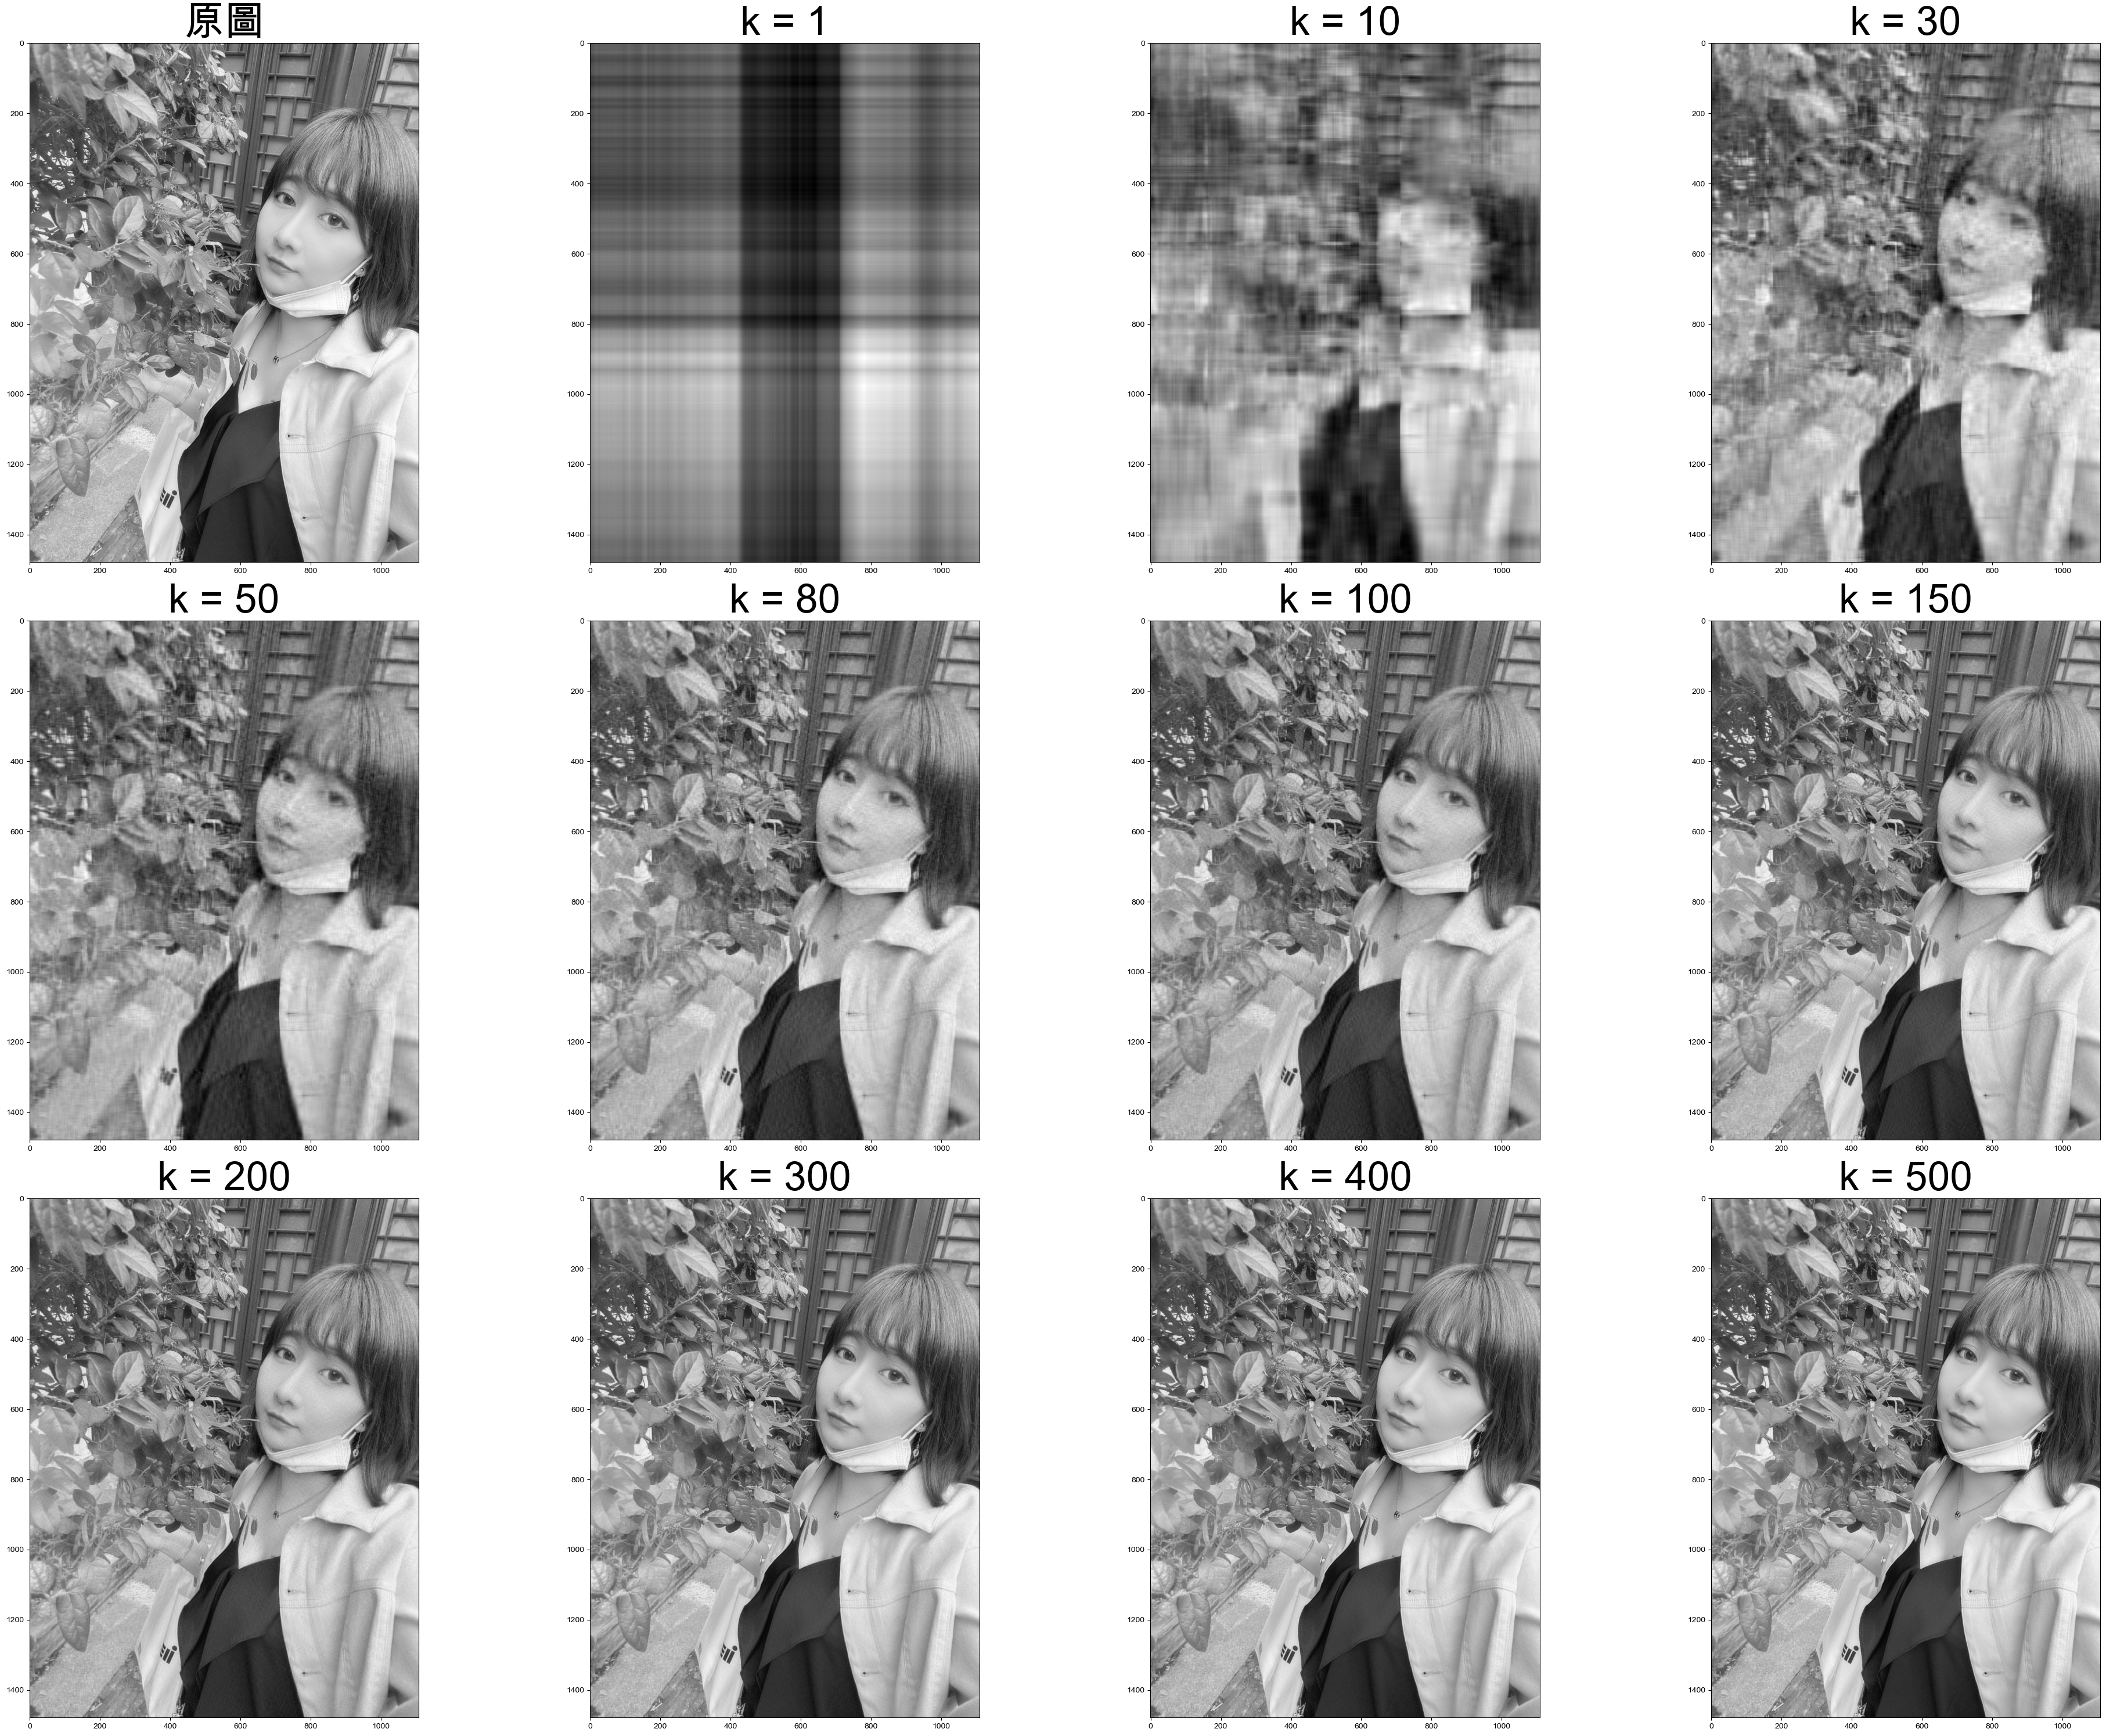

In [7]:
plt.figure(figsize=(40,30))
plt.subplot(3,4,1)
plt.title('原圖', fontsize=50)
plt.imshow(img, cmap = 'gray')
i = 2
kList = [1,10,30,50,80,100,150,200,300,400,500]
normList = []
sigmaList = []
mseList = []
psnrList = []
crList=[]
for k in kList:
    Ak = np.dot(u[:, :k], np.dot(np.diag(s[:k]), vh[:k,:]))
    norm2 = np.linalg.norm(np.subtract(npModel, Ak), ord=2)
    normList.append(norm2)
    sigmaList.append(s[k])
    mse = np.mean((npModel - Ak)**2)
    mseList.append(mse)
    psnr = 10 * np.log10((255**2)/mse)
    psnrList.append(psnr)
    cr = (h * w) / k * (1 + h + w) 
    crList.append(cr)
    plt.subplot(3, 4, i)
    plt.title('k = %i' %k, fontsize = 50)
    i += 1
    plt.imshow(Ak, cmap='gray')
plt.tight_layout()
plt.savefig('text.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

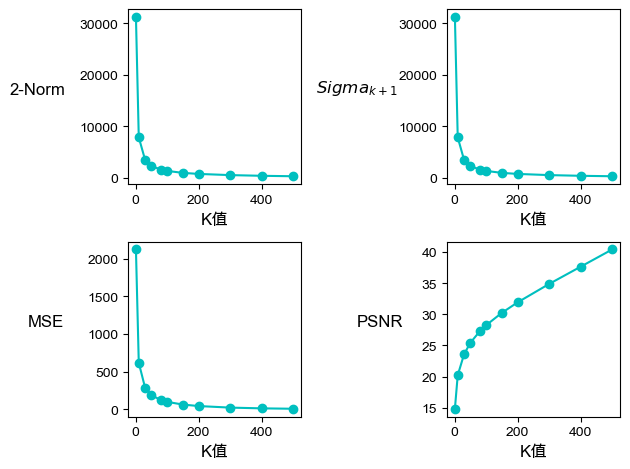

In [8]:
f,ax = plt.subplots(2,2)

ax[0,0].plot(kList,normList, 'co-')
ax[0,0].set_xlabel('K值', fontsize=12)
ax[0,0].set_ylabel('2-Norm', fontsize=12, rotation=0,labelpad=30)

ax[0,1].plot(kList,sigmaList, 'co-')
ax[0,1].set_xlabel('K值', fontsize=12)
ax[0,1].set_ylabel('$Sigma_{k+1}$', fontsize=12, rotation=0, labelpad=30)

ax[1,0].plot(kList,mseList,'co-')
ax[1,0].set_xlabel('K值', fontsize=12)
ax[1,0].set_ylabel('MSE', fontsize=12, rotation=0, labelpad=30)

ax[1,1].plot(kList,psnrList,'co-')
ax[1,1].set_xlabel('K值', fontsize=12)
ax[1,1].set_ylabel('PSNR', fontsize=12, rotation=0, labelpad=30)
plt.tight_layout()
plt.savefig('K值.jpg')
plt.show

In [9]:
import pandas as pd

kValue = {
    'K值':kList,
    '2-Norm':normList,
    'Sigma_k+1':sigmaList,
    'MSE':mseList,
    'PSNR':psnrList,
    'CR':crList
}

df = pd.DataFrame(kValue)
df.to_excel('sheet.xlsx', index=False)

print(df.to_string(index=False))

 K值       2-Norm    Sigma_k+1         MSE      PSNR           CR
  1 31174.789992 31174.789992 2120.741503 14.865926 4.246506e+09
 10  7798.301680  7798.301680  616.454397 20.231794 4.246506e+08
 30  3452.989723  3452.989723  285.828207 23.569753 1.415502e+08
 50  2261.083399  2261.083399  186.127134 25.432707 8.493013e+07
 80  1547.357865  1547.357865  121.860182 27.272185 5.308133e+07
100  1288.178943  1288.178943   97.426714 28.244023 4.246506e+07
150   908.454514   908.454514   61.649956 30.231476 2.831004e+07
200   705.680919   705.680919   41.905743 31.908068 2.123253e+07
300   474.854070   474.854070   21.248946 34.857430 1.415502e+07
400   341.177044   341.177044   11.251523 37.618691 1.061627e+07
500   251.523967   251.523967    5.955144 40.381881 8.493013e+06
